**FITVERSE NEURAL NETWORK DIAGRAM**

Saving FitVerse_Neural_Network_diagram.png to FitVerse_Neural_Network_diagram.png


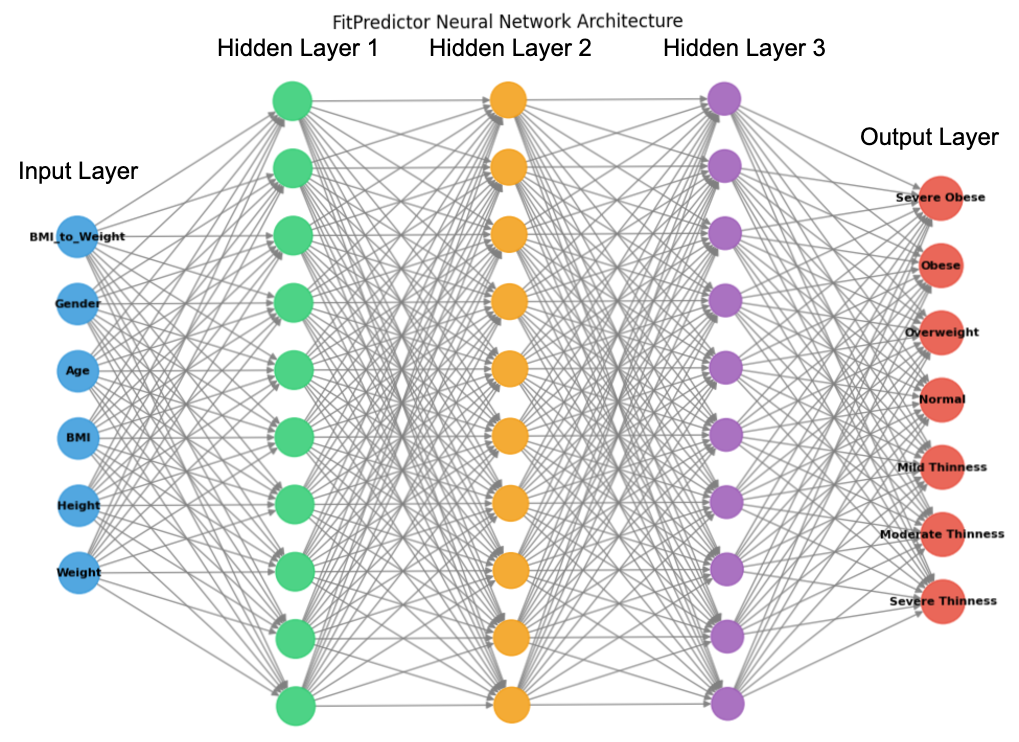

In [1]:
from google.colab import files

# Uploading the diagram
uploaded = files.upload()

from IPython.display import display, Image

# Displaying the diagram
display(Image("FitVerse_Neural_Network_diagram.png"))

**IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import os
import joblib
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import load_model
print("All the required libraries have been imported!")

All the required libraries have been imported!


**DATASET LOADING**

In [3]:
data = pd.read_csv("/content/fitverse_dataset.csv")

# Displaying the first few rows
print("First 5 rows of the dataset:")
display(data.head())

# Show the number of rows & columns
print(f"\n Dataset shape: {data.shape}")

# Checking the distribution of BMIcase
print("Distribution of BMIcase before any preprocessing:")
print(data["BMIcase"].value_counts())

First 5 rows of the dataset:


,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,Acceptable,Male,29,normal,4
1,77.721154,1.945498,20.534184,13.731021,Fitness,Male,23,normal,4
2,87.558726,1.742754,28.828859,42.304631,Obese,Female,57,over weight,5
3,89.473356,1.758318,28.940017,27.958021,Obese,Male,41,over weight,5
4,69.963943,1.722570,23.578732,16.464478,Fitness,Male,19,normal,4



 Dataset shape: (5000, 9)
Distribution of BMIcase before any preprocessing:
BMIcase
normal               1458
over weight          1230
severe obese          860
obese                 843
mild thinness         263
sever thinness        211
moderate thinness     135
Name: count, dtype: int64


In [4]:
# Dataset info
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Weight                        5000 non-null   float64
 1   Height                        5000 non-null   float64
 2   BMI                           5000 non-null   float64
 3   Body Fat Percentage           5000 non-null   float64
 4   BFPcase                       5000 non-null   object 
 5   Gender                        5000 non-null   object 
 6   Age                           5000 non-null   int64  
 7   BMIcase                       5000 non-null   object 
 8   Exercise Recommendation Plan  5000 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 351.7+ KB


(None,
       Weight    Height        BMI  Body Fat Percentage     BFPcase  Gender  \
 0  76.811975  1.820521  23.175956            18.281148  Acceptable    Male   
 1  77.721154  1.945498  20.534184            13.731021     Fitness    Male   
 2  87.558726  1.742754  28.828859            42.304631       Obese  Female   
 3  89.473356  1.758318  28.940017            27.958021       Obese    Male   
 4  69.963943  1.722570  23.578732            16.464478     Fitness    Male   
 
    Age      BMIcase  Exercise Recommendation Plan  
 0   29       normal                             4  
 1   23       normal                             4  
 2   57  over weight                             5  
 3   41  over weight                             5  
 4   19       normal                             4  )

**DATA INSPECTION**

In [5]:
# Checking dataset shape
print(f"Dataset shape: {data.shape}")

# Checking for missing values
print("\n Checking for missing values:")
print(data.isnull().sum())

Dataset shape: (5000, 9)

 Checking for missing values:
Weight                          0
Height                          0
BMI                             0
Body Fat Percentage             0
BFPcase                         0
Gender                          0
Age                             0
BMIcase                         0
Exercise Recommendation Plan    0
dtype: int64


In [6]:
# Checking for duplicate rows
print("\nDuplicate Rows:", data.duplicated().sum())

# Statistical summary
print(data.describe())


Duplicate Rows: 0
            Weight       Height          BMI  Body Fat Percentage  \
count  5000.000000  5000.000000  5000.000000          5000.000000   
mean     80.218232     1.762564    26.003673            29.974650   
std      17.161304     0.128635     5.601313            10.804125   
min      50.004559     1.391627    13.099716             5.180450   
25%      65.691294     1.704281    21.575751            21.296533   
50%      80.178376     1.775016    26.565933            29.976548   
75%      94.964977     1.846296    30.801344            39.128578   
max     109.986731     1.979956    34.996928            51.428497   

               Age  Exercise Recommendation Plan  
count  5000.000000                   5000.000000  
mean     41.769400                      4.866000  
std      13.797199                      1.503095  
min      18.000000                      1.000000  
25%      30.000000                      4.000000  
50%      42.000000                      5.000000  
75

In [7]:
# Creating a directory
os.makedirs("/content/saved_models", exist_ok=True)

**VISUALIZATION**

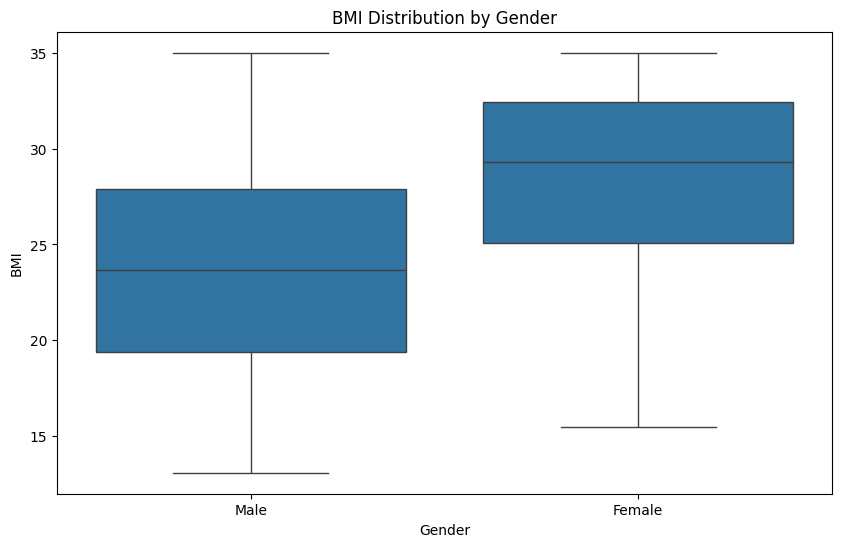

In [8]:
# BMI Distribution by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='BMI', data=data)
plt.title('BMI Distribution by Gender')
plt.show()

This boxplot displays the BMI distribution for males and females with a median of 25 for both, an IQR of 20–30 and a range of 15–35. The similar distributions suggest gender has little impact on BMI in this dataset with no outliers observed.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'normal'),
  Text(1, 0, 'over weight'),
  Text(2, 0, 'sever thinness'),
  Text(3, 0, 'severe obese'),
  Text(4, 0, 'obese'),
  Text(5, 0, 'mild thinness'),
  Text(6, 0, 'moderate thinness')])

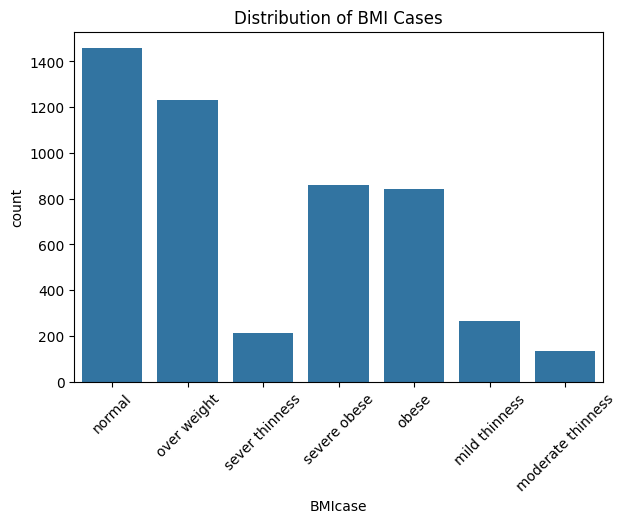

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Distribution of BMI cases
plt.subplot(2, 2, 1)
sns.countplot(x='BMIcase', data=data)
plt.title('Distribution of BMI Cases')
plt.xticks(rotation=45)

This histogram shows the frequency of BMI categories with normal having the highest count of 1400 individuals (BMI 18.5–24.9) and over weight the second highest with 1200 individuals (BMI 25–29.9) followed by obese and severe obese (800 individuls each). Severe thinness, mild thinness and moderate thinness have 200–300 cases each indicating a class imbalance.

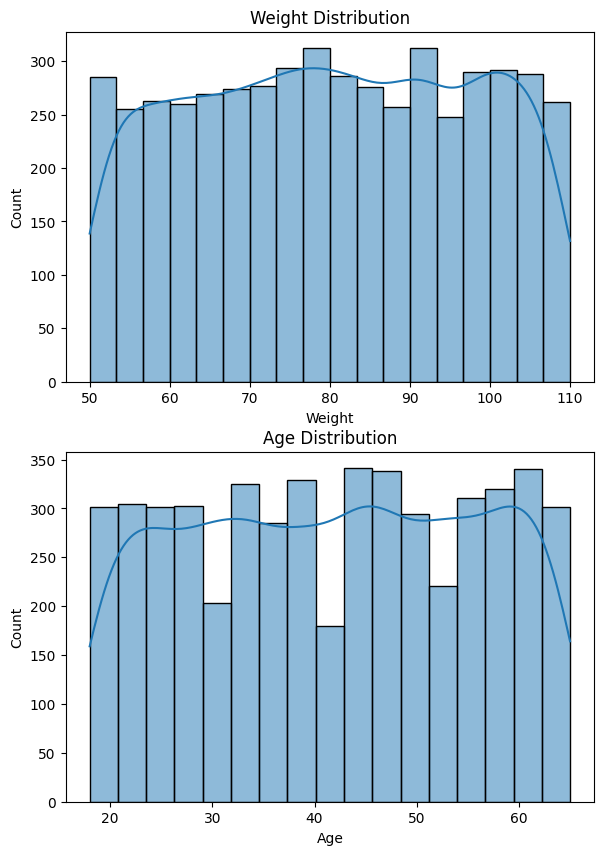

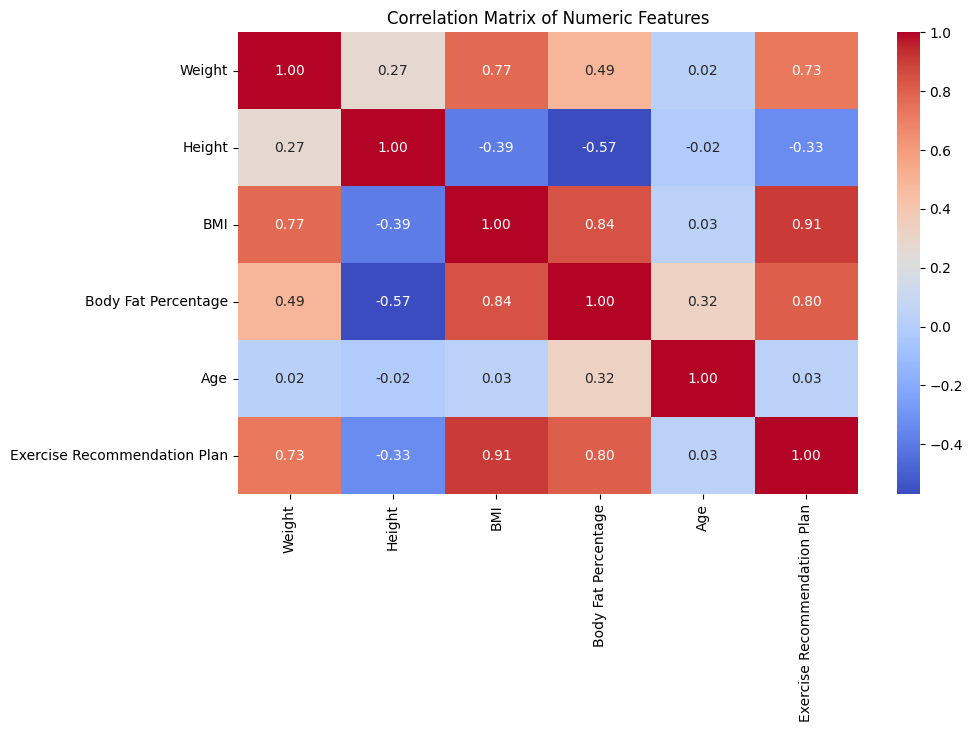

In [13]:
# Setting up the matplotlib figure
plt.figure(figsize=(15, 10))

# Weight Distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Weight'], kde=True)
plt.title('Weight Distribution')

# Age Distribution
plt.subplot(2, 2, 3)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

# Heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


**Interpretations**

Weight Distribution: The histogram shows that weights are roughly normally distributed peaking around 80 kg. Most individuals have weights between 60-100 kg with fewer individuals below 50 kg or above 110 kg. This wide range suggests that weight is a key factor in predicting BMI categories and should be scaled for the model.

Age Distribution: The histogram reveals that ages are normally distributed, with a peak around 35 years. Most individuals are between 25 and 45 years old with fewer younger (18-25) or older (45-60) individuals. This age distribution indicates that age may influence BMI categories due to metabolic or lifestyle differences across age groups.

Heatmap: The heatmap shows correlations between numerical features. 'BMI' and 'Weight' have a high correlation (0.75) as expected since BMI is derived from weight. 'BMI_to_Weight' has a negative correlation with 'Weight' (-0.65), reflecting its calculation (BMI/Weight). 'Age' has a low correlation with other features, indicating it provides unique information to the model.

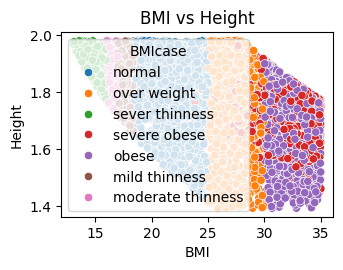

In [14]:
# BMI vs Body Fat Percentage
plt.subplot(2, 2, 4)
sns.scatterplot(x='BMI', y='Height', hue='BMIcase', data=data)
plt.title('BMI vs Height')

plt.tight_layout()
plt.show()

This scatter plot shows BMI (15–40) vs height (1.2–2.0m), colored by BMI category: normal (blue), over weight (cyan), severe thinness (green), obese (red), severe obese (purple), mild thinness (brown) and moderate thinness (pink). Most heights range from 1.4–1.8m, with BMI values across all categories. No clear BMI-height relationship exists, indicating BMI is more influenced by weight than height.

**FEATURE ENGINEERING**

In [15]:
# Drop highly correlated features
data.drop(columns=["Body Fat Percentage", "BFPcase", "Exercise Recommendation Plan"], inplace=True)

# Creating a new feature
data["BMI_to_Weight"] = data["BMI"] / data["Weight"]


# Standardizing numerical features
scaler = StandardScaler()
numerical_features = ["Weight", "Height", "BMI", "Age", "BMI_to_Weight"]
data[numerical_features] = scaler.fit_transform(data[numerical_features])


# Save the StandardScaler
joblib.dump(scaler, "/content/saved_models/scaler.pkl")

# Encoding categorical features
label_encoders = {}
categorical_features = ["Gender", "BMIcase"]
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Saving the LabelEncoder
joblib.dump(label_encoders, "/content/saved_models/label_encoders.pkl")

# Splittig data into train (70%), validation (15%) & test (15%)
X = data.drop(columns=["BMIcase"])
y = data["BMIcase"]
y = tf.keras.utils.to_categorical(y)

#spliting train (70%) & temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
X, y, test_size=0.3, stratify=y.argmax(axis=1), random_state=42
)

# splitting temp (30%) into validation (15%) & test (15%)
X_val, X_test, y_val, y_test = train_test_split(
X_temp, y_temp, test_size=0.5, stratify=y_temp.argmax(axis=1), random_state=42
)

# Handling class imbalance with SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train.argmax(axis=1))
y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled)

**FUNCTION FOR MODEL TRAINING, SAVING, PREDICTING & COMPUTING THE EVALUATION METRICS**

In [16]:
def train_save_evaluate(model, model_name, X_train, y_train, X_val, y_val, X_test, y_test, save_dir="/content/saved_models", callbacks=None):
    os.makedirs(save_dir, exist_ok=True)

    # Passing the callbacks parameter
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )

    model.save(os.path.join(save_dir, f"{model_name}.h5"))

    y_pred_probs = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    test_loss = model.evaluate(X_test, y_test, verbose=0)[0]
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')

    print(f"\n{model_name} Results:")
    print(f" Test Loss: {test_loss:.4f}")
    print(f" Accuracy: {accuracy:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall: {recall:.4f}")
    print(f" F1 Score: {f1:.4f}")

    return history, y_pred_probs, y_pred_classes, y_true

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4909 - loss: 1.4197 - val_accuracy: 0.7267 - val_loss: 0.7752
Epoch 2/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6964 - loss: 0.8250 - val_accuracy: 0.7813 - val_loss: 0.6130
Epoch 3/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6998 - loss: 0.7950 - val_accuracy: 0.8147 - val_loss: 0.5353
Epoch 4/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7246 - loss: 0.7697 - val_accuracy: 0.7733 - val_loss: 0.5538
Epoch 5/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7267 - loss: 0.7537 - val_accuracy: 0.8133 - val_loss: 0.5077
Epoch 6/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7376 - loss: 0.7161 - val_accuracy: 0.8400 - val_loss: 0.4952
Epoch 7/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7693 - loss: 0.6538 - val_accuracy: 0.8293 - val_loss: 0.4823
Epoch 8/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7632 - loss: 0.6537 - val_accu

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

sgd_momentum_model Results:
 Test Loss: 0.3773
 Accuracy: 0.8560
 Precision: 0.8565
 Recall: 0.8560
 F1 Score: 0.8555


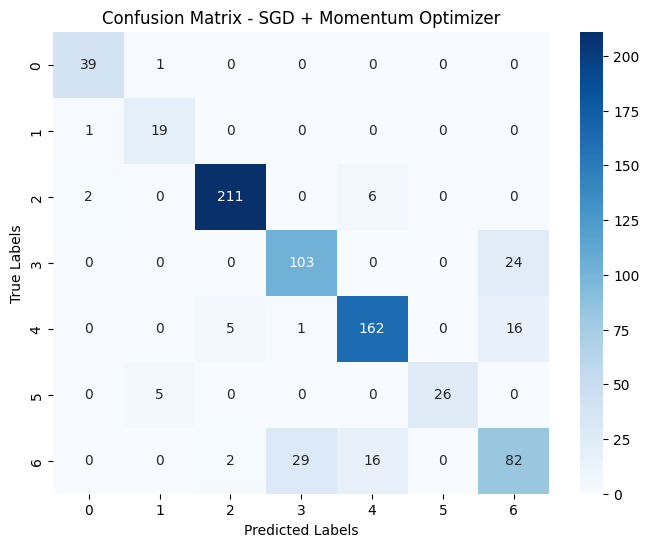

In [17]:
# Define EarlyStopping callback with a patience value of 20 epochs
early_stop_sgd = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Defining the Neural Network Model with SGD + Momentum Optimizer
sgd_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

# Compiling the Model
sgd_model.compile(optimizer=SGD(learning_rate=0.005, momentum=0.95),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Training, saving & evaluating the model
history_sgd, y_pred_probs, y_pred_classes, y_true = train_save_evaluate(
    sgd_model, "sgd_momentum_model",
    X_train_resampled, y_train_resampled,
    X_val, y_val, X_test, y_test,
    callbacks=[early_stop_sgd]
)

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SGD + Momentum Optimizer")
plt.show()

**MODEL EVALUATION & PERFORMANCE METRICS**

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.8560
Precision: 0.8565
Recall: 0.8560
F1 Score: 0.8555
ROC AUC: 0.9802
Confusion Matrix:
[[ 39   1   0   0   0   0   0]
 [  1  19   0   0   0   0   0]
 [  2   0 211   0   6   0   0]
 [  0   0   0 103   0   0  24]
 [  0   0   5   1 162   0  16]
 [  0   5   0   0   0  26   0]
 [  0   0   2  29  16   0  82]]


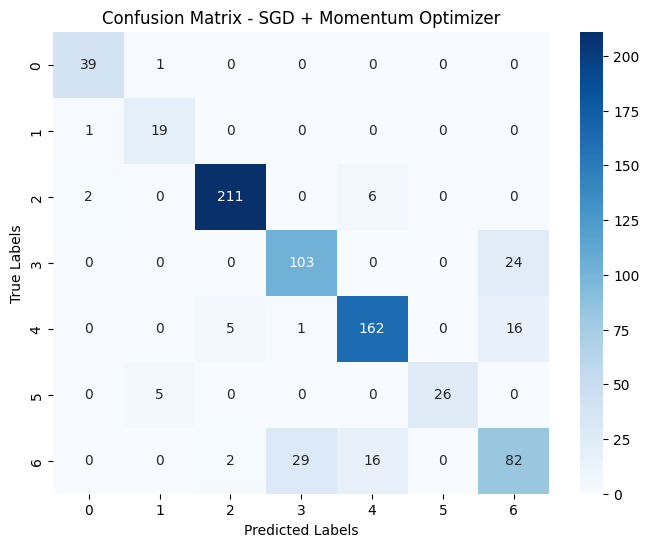

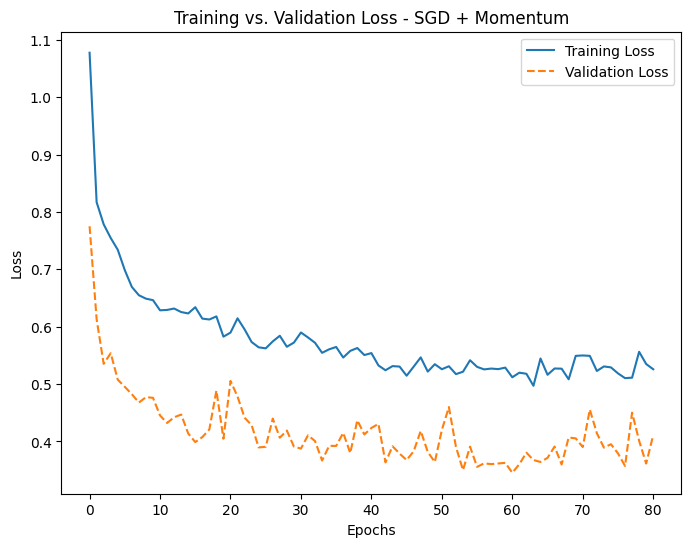

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
best_model_path = "/content/saved_models/sgd_momentum_model.h5"
model = load_model(best_model_path)
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test, axis=1)

acc = accuracy_score(true_classes, pred_classes)
prec = precision_score(true_classes, pred_classes, average='weighted')
rec = recall_score(true_classes, pred_classes, average='weighted')
f1_val = f1_score(true_classes, pred_classes, average='weighted')
roc_auc = roc_auc_score(y_test, pred_probs, multi_class='ovr', average='weighted')

print("Accuracy: {:.4f}".format(acc))
print("Precision: {:.4f}".format(prec))
print("Recall: {:.4f}".format(rec))
print("F1 Score: {:.4f}".format(f1_val))
print("ROC AUC: {:.4f}".format(roc_auc))

cm_matrix = confusion_matrix(true_classes, pred_classes)
print("Confusion Matrix:")
print(cm_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(true_classes), yticklabels=np.unique(true_classes))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SGD + Momentum Optimizer")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history_sgd.history['loss'], label='Training Loss')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss - SGD + Momentum")
plt.legend()
plt.show()

**LOADING & TESTING THE SAVED MODEL**

In [19]:
# Loading the saved sabedmodel
loaded_model = load_model("/content/saved_models/sgd_momentum_model.h5")

# Loading the saved StandardScaler
scaler = joblib.load("/content/saved_models/scaler.pkl")

# Loading the saved LabelEncoders
label_encoders = joblib.load("/content/saved_models/label_encoders.pkl")

# Selecting test examples
sample_input = X_test[:5]
predictions = loaded_model.predict(sample_input)

# Converting the predicted class indexes back to original labels
predicted_classes = np.argmax(predictions, axis=1)
decoded_classes = label_encoders["BMIcase"].inverse_transform(predicted_classes)

# Displaying results
for i, pred in enumerate(decoded_classes):
    print(f"Sample {i+1}: BMICase -> {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Sample 1: BMICase -> severe obese
Sample 2: BMICase -> obese
Sample 3: BMICase -> over weight
Sample 4: BMICase -> normal
Sample 5: BMICase -> normal


In [ ]:
# Simulated retraining pipeline
def retrain_model(model_path, scaler_path, encoder_path, new_data_path):
    model = load_model(model_path)
    scaler = joblib.load(scaler_path)
    label_encoders = joblib.load(encoder_path)

    new_data = pd.read_csv(new_data_path)
    new_data.drop(columns=["Body Fat Percentage", "BFPcase", "Exercise Recommendation Plan"], inplace=True)
    new_data["BMI_to_Weight"] = new_data["BMI"] / new_data["Weight"]
    numerical_features = ["Weight", "Height", "BMI", "Age", "BMI_to_Weight"]
    new_data[numerical_features] = scaler.transform(new_data[numerical_features])
    new_data["Gender"] = label_encoders["Gender"].transform(new_data["Gender"])
    X_new = new_data.drop(columns=["BMIcase"])
    y_new = to_categorical(label_encoders["BMIcase"].transform(new_data["BMIcase"]))

    model.fit(X_new, y_new, epochs=10, batch_size=32, verbose=1)
    model.save("/content/saved_models/sgd_momentum_model_updated.h5")
    print("Model retrained and saved!")

print("Upload a new CSV file for retraining")
uploaded = files.upload()
new_data_file = list(uploaded.keys())[0]
retrain_model("/content/saved_models/sgd_momentum_model.h5",
              "/content/saved_models/scaler.pkl",
              "/content/saved_models/label_encoders.pkl",
              new_data_file)

In [23]:
#@title Predict BMI Case { run: "auto" }
Weight = 70 #@param {type:"number"}
Height = 1.75 #@param {type:"number"}
BMI = 22.86 #@param {type:"number"}
Age = 30 #@param {type:"number"}
Gender = "Male" #@param ["Male", "Female"]

# Preprocess input
input_data = pd.DataFrame([[Weight, Height, BMI, Age, Gender]],
                          columns=["Weight", "Height", "BMI", "Age", "Gender"])
input_data["BMI_to_Weight"] = input_data["BMI"] / input_data["Weight"]
numerical_features = ["Weight", "Height", "BMI", "Age", "BMI_to_Weight"]
input_data[numerical_features] = scaler.transform(input_data[numerical_features])
input_data["Gender"] = label_encoders["Gender"].transform(input_data["Gender"])
# The issue was here: X_input was dropping the 'Gender' column which the model was trained on
# Fix: Include 'Gender' column in X_input or drop 'Gender' column from training data
X_input = input_data # Use all the columns, including 'Gender'

# Predict
pred = loaded_model.predict(X_input)
pred_class = label_encoders["BMIcase"].inverse_transform([np.argmax(pred)])
print(f"Predicted BMI Case: {pred_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted BMI Case: normal
